In [1]:
# The Bank Marketing dataset is a data set that contains information about direct marketing campaigns 
# of a Portuguese banking institution. The goal of the dataset is to predict whether a client will 
# subscribe to a term deposit (variable "deposit").

# The dataset has 41188 rows and 20 columns. The columns include information about the "client's" 
# age, job, marital status, education, default, housing, loan, contact, month, day_of_week, 
# duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, 
# and nr.employed.
 
# The target variable is "deposit". It is a binary variable that indicates whether the client subscribed 
# to a term deposit (Yes/No).

# The problem is to build a machine learning model that can predict whether a client will subscribe to a 
# term deposit based on the information in the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [3]:
# Load the dataset
data_path = "bank.csv"
df = pd.read_csv(data_path, sep=';')

# Data Cleaning: Check for missing values
missing_values = df.isnull().sum()

# Data Summary: Basic statistics for numerical variables
numeric_summary = df.describe()

# Data Summary: Unique values, counts, and mode for categorical variables
categorical_summary = pd.DataFrame(columns=['Feature', 'Unique_Values', 'Counts', 'Mode'])
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].nunique()
    counts = df[column].value_counts()
    mode = df[column].mode().values[0]
    categorical_summary = pd.concat([categorical_summary,
                                     pd.DataFrame({'Feature': [column],
                                                   'Unique_Values': [unique_values],
                                                   'Counts': [counts.to_dict()],
                                                   'Mode': [mode]})])

# Data Summary: Features, Target Variable, and Shape of the dataset
features = df.drop('y', axis=1)
target_variable = df['y']
dataset_shape = df.shape

# Print the Data Summary
print("Data Summary:")
print("------------")
print("\nFeatures:\n", features.head().to_string(index=False)) # Added to_string() for better display
print("\nTarget Variable (y):\n", target_variable.head().to_string(index=False)) # Added to_string() for better display
print("\nShape of the dataset:", dataset_shape)
print("\nMissing Values:\n", missing_values[missing_values > 0])
print("\nNumeric Summary:\n", numeric_summary)
print("\nCategorical Summary:")
print(categorical_summary.to_string(index=False)) # Added to_string() for better display


Data Summary:
------------

Features:
  age         job marital education default  balance housing loan  contact  day month  duration  campaign  pdays  previous poutcome
  30  unemployed married   primary      no     1787      no   no cellular   19   oct        79         1     -1         0  unknown
  33    services married secondary      no     4789     yes  yes cellular   11   may       220         1    339         4  failure
  35  management  single  tertiary      no     1350     yes   no cellular   16   apr       185         1    330         1  failure
  30  management married  tertiary      no     1476     yes  yes  unknown    3   jun       199         4     -1         0  unknown
  59 blue-collar married secondary      no        0     yes   no  unknown    5   may       226         1     -1         0  unknown

Target Variable (y):
 no
no
no
no
no

Shape of the dataset: (4521, 17)

Missing Values:
 Series([], dtype: int64)

Numeric Summary:
                age       balance         

In [4]:
# Separate the input features (X) and target variable (y)
X = df.drop('y', axis=1)
y = df['y']

# Data Splitting: Divide the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Shapes of the datasets:")
print("-----------------------")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of the datasets:
-----------------------
X_train shape: (3616, 16)
X_test shape: (905, 16)
y_train shape: (3616,)
y_test shape: (905,)


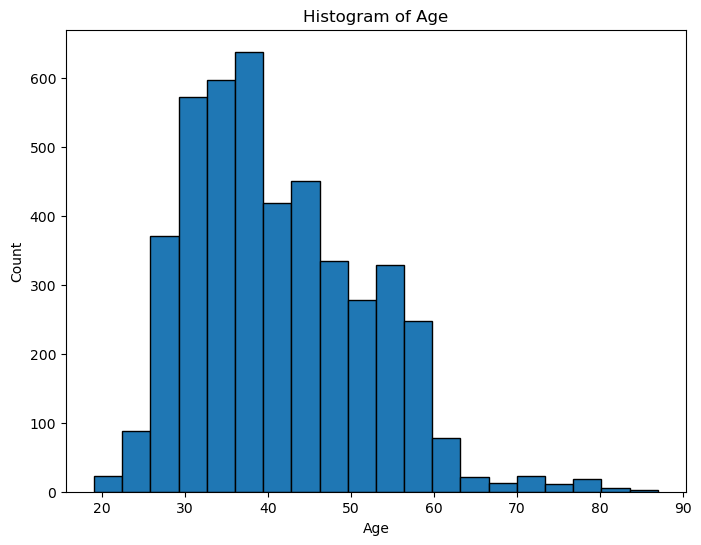

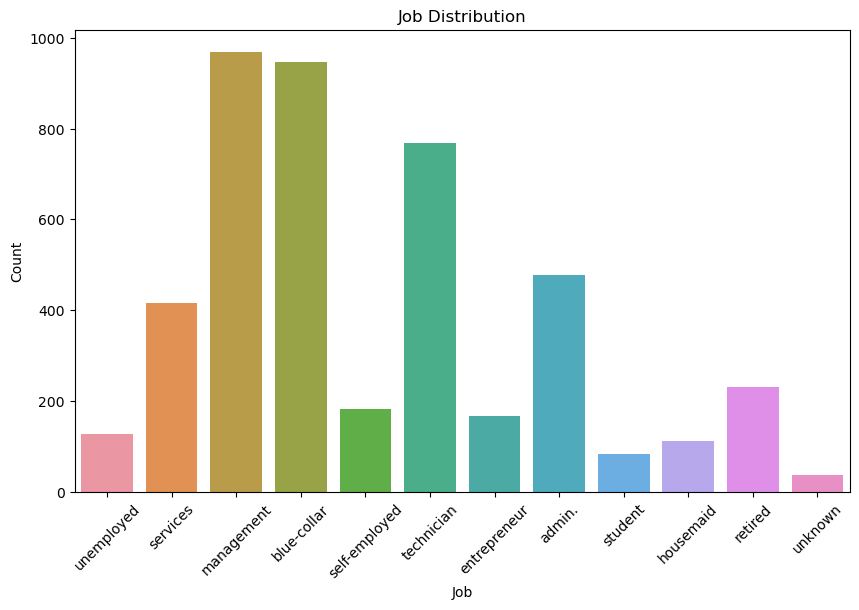

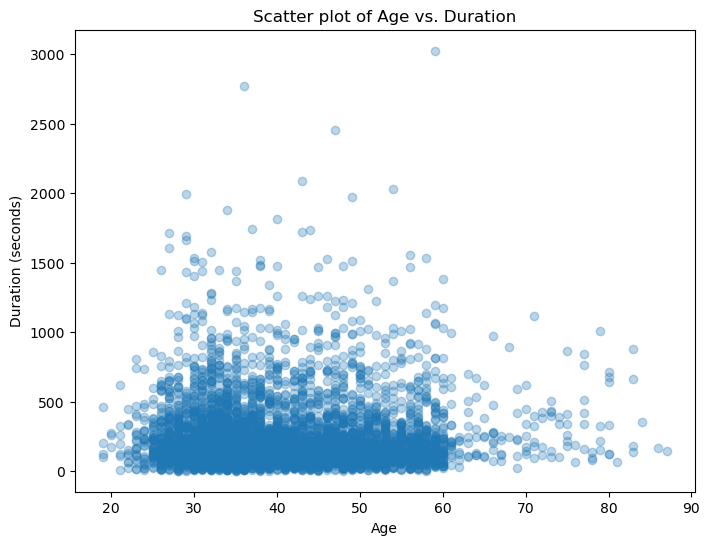

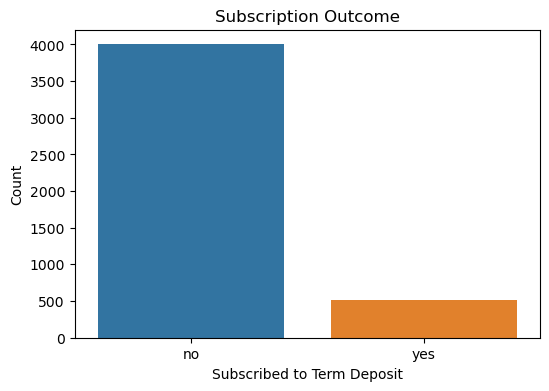

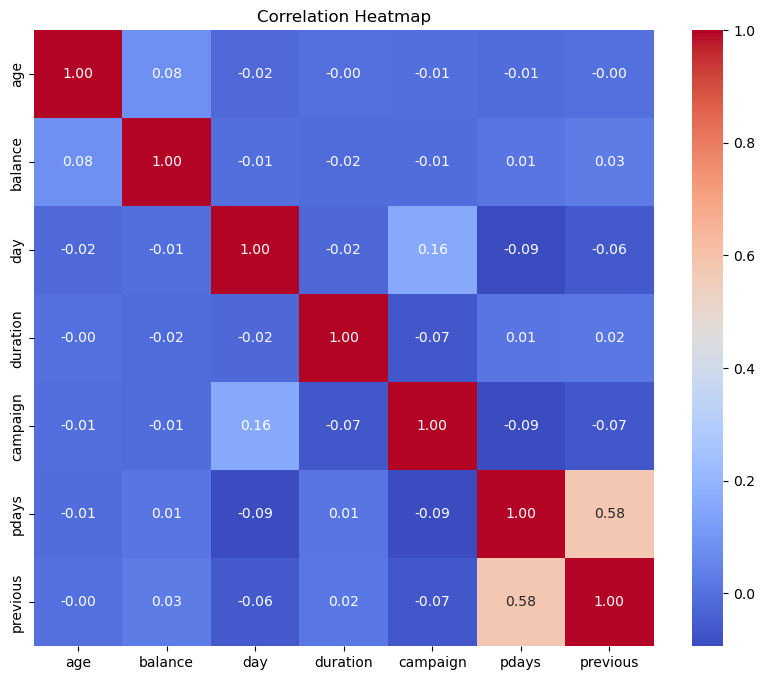

In [5]:
# Data Visualization: Histogram of age
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

# Data Visualization: Bar plot of job distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.show()

# Data Visualization: Scatter plot of age vs. duration
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['duration'], alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.title('Scatter plot of Age vs. Duration')
plt.show()

# Data Visualization: Bar plot of subscription outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.title('Subscription Outcome')
plt.show()

# Data Visualization: Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
numeric_features = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Perform one-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate the input features (X) and target variable (y)
X = df.drop('y_yes', axis=1)  # Drop the target variable y_yes (subscribed yes)
y = df['y_yes']

# Data Splitting: Divide the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Select the top 5 features
selected_features = sorted_feature_importance[:5].index.tolist()

# Print the selected features
print("Selected Features:")
print("------------------")
print(selected_features)

Selected Features:
------------------
['duration', 'age', 'balance', 'day', 'poutcome_success']


In [7]:
# Update the training and testing datasets to include only the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Feature Scaling: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Hyperparameter Optimization

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000, fit_intercept=True, random_state=42)  # Set fit_intercept=True
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train_scaled, y_train)
lr_best_model = lr_grid.best_estimator_

# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

# Model 3: Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
gb_best_model = gb_grid.best_estimator_

# Compare Model Performance using appropriate metrics

models = {'Logistic Regression': lr_best_model,
          'Random Forest': rf_best_model,
          'Gradient Boosting': gb_best_model}

performance_metrics = {'Accuracy': accuracy_score,
                       'Precision': precision_score,
                       'Recall': recall_score}

print("Model Performance:")
print("------------------")

for model_name, model in models.items():
    print(f"Model: {model_name}")
    for metric_name, metric_func in performance_metrics.items():
        if model_name == 'Logistic Regression':
            y_pred = model.predict(X_test_scaled)
        else:
            y_pred = model.predict(X_test)
        metric_value = metric_func(y_test, y_pred)
        print(f"{metric_name}: {metric_value:.4f}")
    print("------------------")

# Select the best performing model
best_model_name = max(models, key=lambda k: accuracy_score(y_test, models[k].predict(X_test)))
best_model = models[best_model_name]

print(f"Best Performing Model: {best_model_name}")

Model Performance:
------------------
Model: Logistic Regression
Accuracy: 0.8961
Precision: 0.5435
Recall: 0.2551
------------------
Model: Random Forest
Accuracy: 0.8950
Precision: 0.5349
Recall: 0.2347
------------------
Model: Gradient Boosting
Accuracy: 0.9017
Precision: 0.5789
Recall: 0.3367
------------------
Best Performing Model: Gradient Boosting


/Users/malikasharma/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [8]:
# Final Model Selection and Training

# Model: Gradient Boosting (best performing model from hyperparameter optimization)
gb = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)  # Use the best hyperparameters
gb.fit(X_train_scaled, y_train)

# Update the best model with the new X_train_scaled
best_model.fit(X_train_scaled, y_train)

# Evaluate the final model on the test data
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Final Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Final Model Performance:
Accuracy: 0.9017
Precision: 0.5789
Recall: 0.3367
F1-score: 0.4258


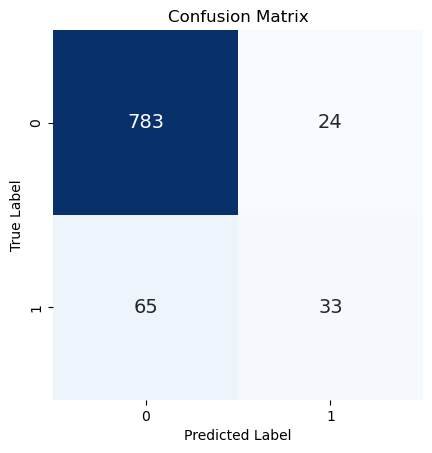

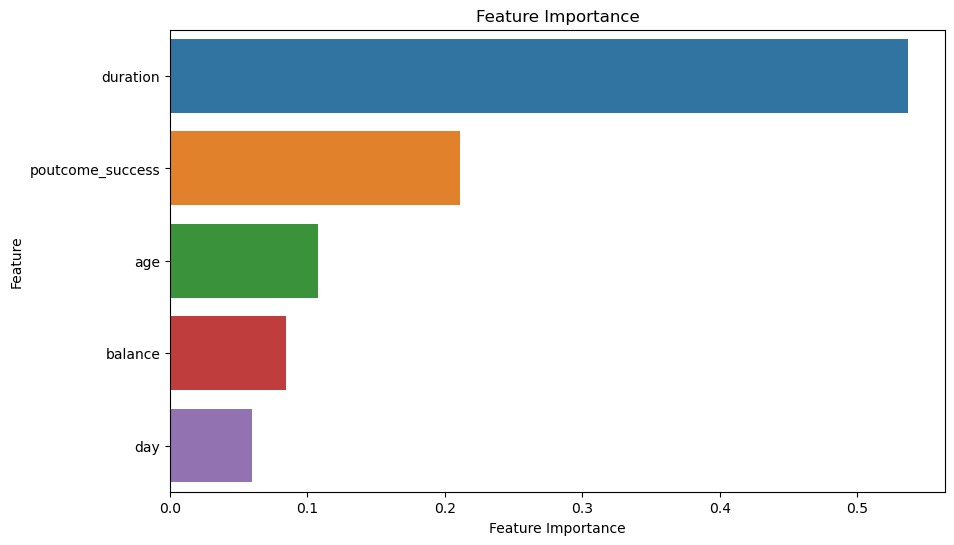

Top 5 Features:
['duration', 'poutcome_success', 'age', 'balance', 'day']


In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, annot_kws={"size": 14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
if hasattr(gb, 'feature_importances_'):
    feature_importance = gb.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

# Check Assumption: Top 5 Features
top_5_features = feature_importance_df.head(5)['Feature'].tolist()
print("Top 5 Features:")
print(top_5_features)